In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed


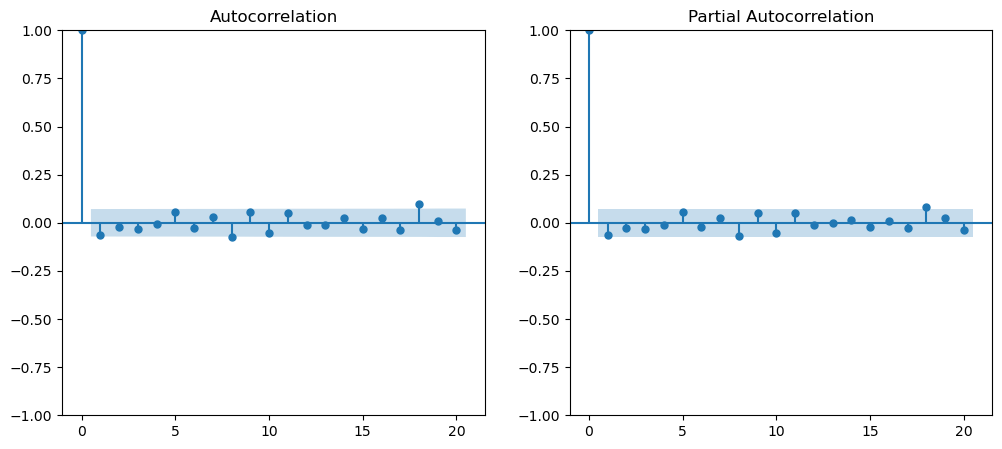

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  756
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1830.978
Date:                Sun, 29 Dec 2024   AIC                           3667.957
Time:                        17:00:24   BIC                           3681.837
Sample:                             0   HQIC                          3673.303
                                - 756                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3950      0.371      1.066      0.287      -0.331       1.121
ma.L1         -0.4596      0.362     -1.270      0.204      -1.169       0.250
sigma2         7.4807      0.300     24.936      0.0

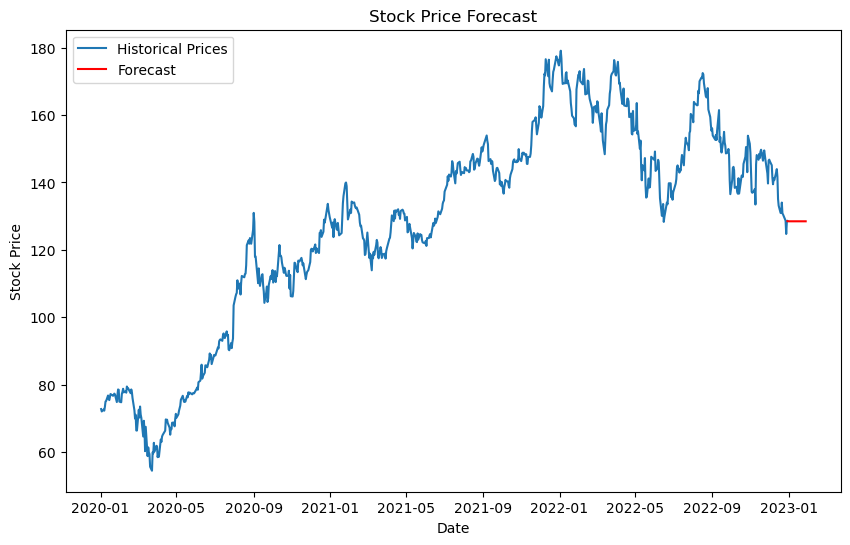

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import yfinance as yf

# Load stock data (e.g., Apple stock)
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
close_prices = data['Close']

# Differencing to check for stationarity
diff = close_prices.diff().dropna()

# Plotting ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(diff, lags=20, ax=ax1)
plot_pacf(diff, lags=20, ax=ax2)
plt.show()

# Define ARIMA Model (ARIMA(p, d, q))
# Here, we choose p=1, d=1, q=1 as a starting point
model = ARIMA(close_prices, order=(1, 1, 1))
fitted_model = model.fit()

# Summary of the model
print(fitted_model.summary())

# Forecasting
forecast = fitted_model.forecast(steps=30)  # Forecast for the next 30 days
forecast_dates = pd.date_range(start=close_prices.index[-1], periods=30, freq='D')

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(close_prices, label='Historical Prices')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Forecast')
plt.legend()
plt.show()
